In [1]:
import numpy as np
import pandas as pd
import datetime
import util

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

actynames = [
             'W_Validate application','W_Call after offers', 'W_Assess potential fraud',
             'W_Call incomplete files', 'W_Complete application', 'W_Handle leads',
             'W_Personal Loan collection', 'W_Shortened completion'
            ]

df = pd.read_csv('Without incomplete cases-BPI Challenge 2017 2.csv', delimiter=';', encoding='utf-8-sig')
workitemsdf = df[ df['Activity'].isin(actynames) ]
N = workitemsdf.shape[0]

df = pd.read_csv('workitems.csv', delimiter=',', index_col=0)
df.head()

Case ID                Activity          Start Timestamp  \
10   Application_652823628  W_Validate application  2016/01/13 11:10:55.145   
11   Application_652823628            A_Validating  2016/01/13 11:10:55.973   
15   Application_652823628  W_Validate application  2016/01/14 11:39:51.494   
16   Application_652823628            A_Validating  2016/01/14 11:39:51.556   
29  Application_1691306052  W_Validate application  2016/01/07 07:40:08.560   

         Complete Timestamp                 Delta Trans  \
10  2016/01/13 11:10:55.145  11 days 01:40:26.512000000   
11  2016/01/13 11:10:55.973   0 days 00:00:00.828000000   
15  2016/01/14 11:39:51.494   0 days 04:23:30.520000000   
16  2016/01/14 11:39:51.556   0 days 00:00:00.062000000   
29  2016/01/07 11:29:49.725   4 days 22:37:03.214000000   

                   Delta Exec                       Delta  Status  \
10  0 days 00:00:00.000000000  11 days 01:40:26.512000000       1   
11  0 days 00:00:00.000000000   0 days 00:00:00.828000000       1   
15  0 days 00:00:00.000000000   0 days 04:23:30.520000000       1   
16  0 days 00:00:00.000000000   0 days 00:00:00.062000000       1   
29  0 days 03:49:41.165000000   5 days 02:26:44.379000000       1   

                     owner  
10  W_Validate application  
11  W_Validate application  
15  W_Validate application  
16  W_Validate application  
29  W_Validate application

In [2]:
#Get only w* activities
workitemsdf = df[ df['Activity'].isin(actynames) ]
mask = pd.to_timedelta(workitemsdf['Delta'].map(str))  > pd.Timedelta('1 Second') 
deltadf = workitemsdf.loc[mask]
M = deltadf.shape[0]

print "total activities", N, "sampled activities", M, "size", float(M)/N

total activities 127820 sampled activities 108601 size 0.849640118917


In [3]:
print deltadf.head()

                   Case ID                Activity          Start Timestamp  \
10   Application_652823628  W_Validate application  2016/01/13 11:10:55.145   
15   Application_652823628  W_Validate application  2016/01/14 11:39:51.494   
29  Application_1691306052  W_Validate application  2016/01/07 07:40:08.560   
52   Application_428409768  W_Validate application  2016/01/13 14:01:21.201   
70  Application_1746793196  W_Validate application  2016/01/25 11:37:28.559   

         Complete Timestamp                 Delta Trans  \
10  2016/01/13 11:10:55.145  11 days 01:40:26.512000000   
15  2016/01/14 11:39:51.494   0 days 04:23:30.520000000   
29  2016/01/07 11:29:49.725   4 days 22:37:03.214000000   
52  2016/01/13 14:01:21.201   0 days 03:42:16.026000000   
70  2016/01/28 07:18:39.340  16 days 03:48:54.642000000   

                   Delta Exec                       Delta  Status  \
10  0 days 00:00:00.000000000  11 days 01:40:26.512000000       1   
15  0 days 00:00:00.000000000   

In [4]:
#Data wrangling 1 - converting strings to timestamps
deltadf['Delta Exec'] = pd.to_timedelta(deltadf['Delta Exec'].map(str))
deltadf['Delta'] = pd.to_timedelta(deltadf['Delta'].map(str))
deltadf['Delta Trans'] = pd.to_timedelta(deltadf['Delta Trans'].map(str))
print deltadf.head()

/Users/Varela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Varela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


                   Case ID                Activity          Start Timestamp  \
10   Application_652823628  W_Validate application  2016/01/13 11:10:55.145   
15   Application_652823628  W_Validate application  2016/01/14 11:39:51.494   
29  Application_1691306052  W_Validate application  2016/01/07 07:40:08.560   
52   Application_428409768  W_Validate application  2016/01/13 14:01:21.201   
70  Application_1746793196  W_Validate application  2016/01/25 11:37:28.559   

         Complete Timestamp             Delta Trans             Delta Exec  \
10  2016/01/13 11:10:55.145 11 days 01:40:26.512000        0 days 00:00:00   
15  2016/01/14 11:39:51.494  0 days 04:23:30.520000        0 days 00:00:00   
29  2016/01/07 11:29:49.725  4 days 22:37:03.214000 0 days 03:49:41.165000   
52  2016/01/13 14:01:21.201  0 days 03:42:16.026000        0 days 00:00:00   
70  2016/01/28 07:18:39.340 16 days 03:48:54.642000 2 days 19:41:10.781000   

                     Delta  Status                   own

/Users/Varela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
pivotdf  = deltadf
# maskexec = pd.to_timedelta(pivotdf['Delta Exec'].map(str))   > pd.Timedelta('1 Second')
# maskwait = pd.to_timedelta(pivotdf['Delta Trans'].map(str))  > pd.Timedelta('1 Second')
maskexec = pivotdf['Delta Exec']   > pd.Timedelta('1 Second')
maskwait = pivotdf['Delta Trans']  > pd.Timedelta('1 Second')


pivotdf['Wait'] = np.array(maskwait, dtype=np.int32)
pivotdf['Exec'] = np.array(maskexec, dtype=np.int32)



tables = []
tables.append( pd.pivot_table(pivotdf, values=['Delta'], columns=['Activity'], aggfunc=len)    )
tables.append( pd.pivot_table(pivotdf, values=['Wait'] , columns=['Activity'], aggfunc=np.sum) )  
tables.append( pd.pivot_table(pivotdf, values=['Exec'] , columns=['Activity'], aggfunc=np.sum) )  

table = pd.concat(tables,axis=0)
print table

Activity  W_Assess potential fraud  W_Call after offers  \
Delta                          419                  477   
Wait                           419                  136   
Exec                           324                  342   

Activity  W_Call incomplete files  W_Complete application  W_Handle leads  \
Delta                       33016                   29512            3705   
Wait                        33016                   20496            3705   
Exec                         3025                   19059            3470   

Activity  W_Personal Loan collection  W_Shortened completion  \
Delta                              2                      87   
Wait                               2                      87   
Exec                               0                       0   

Activity  W_Validate application  
Delta                      41383  
Wait                       41383  
Exec                       16245  


/Users/Varela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Varela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# for transition time - waittime
waitpivotdf  = deltadf



# maskwait = pd.to_timedelta(pivotdf['Delta Trans'].map(str))  > pd.Timedelta('1 Second')
maskwait = waitpivotdf['Delta Trans']  > pd.Timedelta('1 Second')
waitpivotdf  = waitpivotdf .loc[maskwait]

waitpivotdf['Delta Trans'] = pd.to_timedelta(waitpivotdf['Delta Trans'].map(str)).dt.total_seconds() / (24*3600)
tables = []
tables.append( pd.pivot_table(waitpivotdf, values=['Delta Trans'], columns=['Activity'], aggfunc=len)    )
tables.append( pd.pivot_table(waitpivotdf, values=['Delta Trans'], columns=['Activity'], aggfunc=np.sum)    )
tables.append( pd.pivot_table(waitpivotdf, values=['Delta Trans'], columns=['Activity'], aggfunc=np.mean)    )
tables.append( pd.pivot_table(waitpivotdf, values=['Delta Trans'], columns=['Activity'], aggfunc=np.std)    )
tables.append( pd.pivot_table(waitpivotdf, values=['Delta Trans'], columns=['Activity'], aggfunc=np.min)    )
tables.append( pd.pivot_table(waitpivotdf, values=['Delta Trans'], columns=['Activity'], aggfunc=np.median)    )
tables.append( pd.pivot_table(waitpivotdf, values=['Delta Trans'], columns=['Activity'], aggfunc=np.max)    )

table = pd.concat(tables, axis=0)

    
    
print table

table.to_csv('throughput_analysis_3_wait.csv', sep=',')

    

Activity     W_Assess potential fraud  W_Call after offers  \
Delta Trans                419.000000           136.000000   
Delta Trans                921.523678           782.816505   
Delta Trans                  2.199341             5.756004   
Delta Trans                  3.082053             6.066028   
Delta Trans                  0.000068             0.000018   
Delta Trans                  1.012501             3.998661   
Delta Trans                 24.719177            26.198207   

Activity     W_Call incomplete files  W_Complete application  W_Handle leads  \
Delta Trans             33016.000000            20496.000000     3705.000000   
Delta Trans             51904.964814            18553.088108      863.367791   
Delta Trans                 1.572115                0.905205        0.233028   
Delta Trans                 2.068686                0.993661        0.370546   
Delta Trans                 0.000014                0.000015        0.000016   
Delta Trans            

/Users/Varela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
# for transition time - waittime
execpivotdf  = deltadf

# maskexec = pd.to_timedelta(pivotdf['Delta Exec'].map(str))  > pd.Timedelta('1 Second')
maskwait = execpivotdf['Delta Exec']  > pd.Timedelta('1 Second')

execpivotdf  = deltadf.loc[maskexec]

execpivotdf['Delta Exec'] = pd.to_timedelta(execpivotdf['Delta Exec'].map(str)).dt.total_seconds() / (24*3600)
tables = []
tables.append( pd.pivot_table(execpivotdf, values=['Delta Exec'], columns=['Activity'], aggfunc=len)    )
tables.append( pd.pivot_table(execpivotdf, values=['Delta Exec'], columns=['Activity'], aggfunc=np.sum)    )
tables.append( pd.pivot_table(execpivotdf, values=['Delta Exec'], columns=['Activity'], aggfunc=np.mean)    )
tables.append( pd.pivot_table(execpivotdf, values=['Delta Exec'], columns=['Activity'], aggfunc=np.std)    )
tables.append( pd.pivot_table(execpivotdf, values=['Delta Exec'], columns=['Activity'], aggfunc=np.min)    )
tables.append( pd.pivot_table(execpivotdf, values=['Delta Exec'], columns=['Activity'], aggfunc=np.median)    )
tables.append( pd.pivot_table(execpivotdf, values=['Delta Exec'], columns=['Activity'], aggfunc=np.max)    )

table = pd.concat(tables, axis=0)

    
    
print table
table.to_csv('throughput_analysis_3_exec.csv', sep=',')

    

Activity    W_Assess potential fraud  W_Call after offers  \
Delta Exec                324.000000           342.000000   
Delta Exec               1172.577318           511.292930   
Delta Exec                  3.619066             1.495009   
Delta Exec                  7.692520             6.470570   
Delta Exec                  0.000094             0.000019   
Delta Exec                  1.032907             0.000825   
Delta Exec                 88.240690            96.019134   

Activity    W_Call incomplete files  W_Complete application  W_Handle leads  \
Delta Exec              3025.000000            19059.000000     3470.000000   
Delta Exec             20902.488140             7527.581609       54.274559   
Delta Exec                 6.909913                0.394962        0.015641   
Delta Exec                13.491500                1.285866        0.093067   
Delta Exec                 0.000017                0.000093        0.000014   
Delta Exec                 0.917193  

/Users/Varela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# for transition time - waittime
pivotdf  = deltadf

# pivotdf['Delta'] = pd.to_timedelta(pivotdf['Delta'].map(str)).dt.total_seconds() / (24*3600)
pivotdf['Delta'] = pivotdf['Delta'].dt.total_seconds() / (24*3600)
tables = []
tables.append( pd.pivot_table(pivotdf, values=['Delta'], columns=['Activity'], aggfunc=len)    )
tables.append( pd.pivot_table(pivotdf, values=['Delta'], columns=['Activity'], aggfunc=np.sum)    )
tables.append( pd.pivot_table(pivotdf, values=['Delta'], columns=['Activity'], aggfunc=np.mean)    )
tables.append( pd.pivot_table(pivotdf, values=['Delta'], columns=['Activity'], aggfunc=np.std)    )
tables.append( pd.pivot_table(pivotdf, values=['Delta'], columns=['Activity'], aggfunc=np.min)    )
tables.append( pd.pivot_table(pivotdf, values=['Delta'], columns=['Activity'], aggfunc=np.median)    )
tables.append( pd.pivot_table(pivotdf, values=['Delta'], columns=['Activity'], aggfunc=np.max)    )

table = pd.concat(tables, axis=0)

    
    
print table

table.to_csv('throughput_analysis_3_delta.csv', sep=',')

    

Activity  W_Assess potential fraud  W_Call after offers  \
Delta                   419.000000           477.000000   
Delta                  2094.100996          1294.109599   
Delta                     4.997854             2.713018   
Delta                     7.732539             6.642741   
Delta                     0.000089             0.000018   
Delta                     2.849535             0.002449   
Delta                    92.093286            96.019134   

Activity  W_Call incomplete files  W_Complete application  W_Handle leads  \
Delta                33016.000000            29512.000000     3705.000000   
Delta                72807.452954            26080.671828      917.642384   
Delta                    2.205217                0.883731        0.247677   
Delta                    5.055021                1.380741        0.378349   
Delta                    0.000014                0.000028        0.000016   
Delta                    0.853402                0.449157        

/Users/Varela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Days (activity total N=41,383)


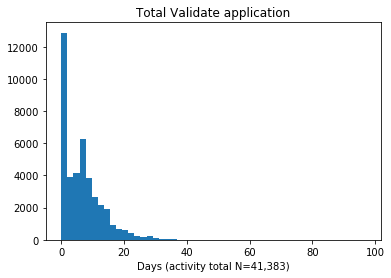

Days (activity wait=41,383 vs exec=16,245)


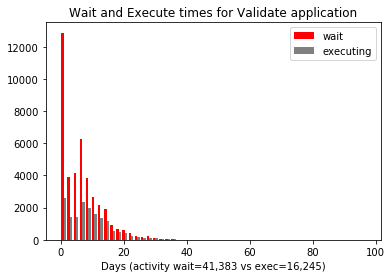

In [17]:
acty = 'Validate application'
mask = deltadf['Activity'] == 'W_Validate application'
actydf = deltadf.loc[mask]

maskexec = actydf['Delta Exec']  > pd.Timedelta('1 Second')
maskwait = actydf['Delta Trans'] > pd.Timedelta('1 Second')


# x =  pd.to_timedelta(actydf['Delta']) / np.timedelta64(1, 's')
x =  actydf['Delta']
# x =  util.seconds2hours(x)
# x =  x / 24
n = actydf.shape[0]
xlabel = "Days (activity total N=%s)" % ("{:,}".format(n))
print xlabel
title = "Total " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist(x, bins=50, color='#1f77b4')
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

w = x[maskwait]
y = x[maskexec]
n = len(y)
xlabel = "Days (activity wait=%s vs exec=%s)" % ("{:,}".format(len(w)),"{:,}".format(len(y)))
print xlabel
title = "Wait and Execute times for " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist((w,y), bins=50, color=('red','gray'))
plt.legend(('wait','executing'))
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()







Days (activity total N=477)


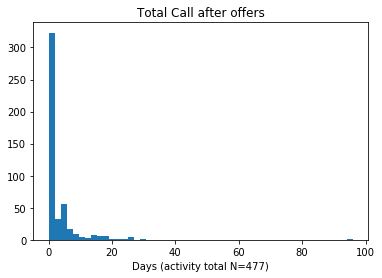

Days (activity wait=136 vs exec=342)


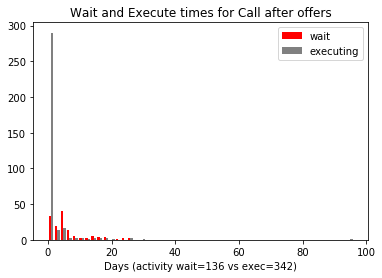

In [18]:
acty = 'Call after offers'
mask = deltadf['Activity'] == 'W_Call after offers'
actydf = deltadf.loc[mask]
# maskexec = pd.to_timedelta(actydf['Delta Exec'])   > pd.Timedelta('1 Second')
# maskwait = pd.to_timedelta(actydf['Delta Trans'])  > pd.Timedelta('1 Second')
maskexec = actydf['Delta Exec']  > pd.Timedelta('1 Second')
maskwait = actydf['Delta Trans'] > pd.Timedelta('1 Second')


# x =  pd.to_timedelta(actydf['Delta']) / np.timedelta64(1, 's')
# x =  util.seconds2hours(x)
# x =  x / 24
x =  actydf['Delta']
n = actydf.shape[0]
xlabel = "Days (activity total N=%s)" % ("{:,}".format(n))
print xlabel
title = "Total " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist(x, bins=50, color='#1f77b4')
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() +  ".eps", format='eps', dpi=1000)
plt.show()

w = x[maskwait]
y = x[maskexec]
n = len(y)
xlabel = "Days (activity wait=%s vs exec=%s)" % ("{:,}".format(len(w)),"{:,}".format(len(y)))
print xlabel
title = "Wait and Execute times for " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist((w,y), bins=50, color=('red','gray'))
plt.legend(('wait','executing'))
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() +  ".eps", format='eps', dpi=1000)
plt.show()







Days (activity total N=419)


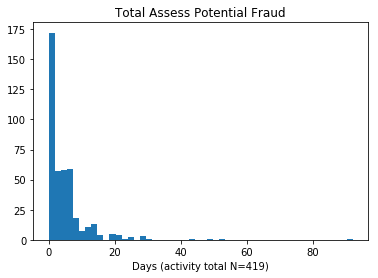

Days (activity wait=419 vs exec=324)


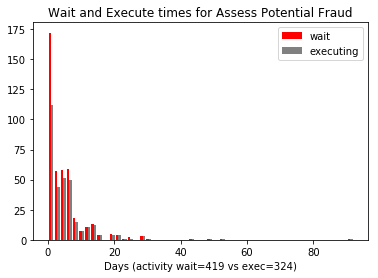

In [11]:
acty = 'Assess Potential Fraud'
mask = deltadf['Activity'] == 'W_Assess potential fraud'
actydf = deltadf.loc[mask]
# maskexec = pd.to_timedelta(actydf['Delta Exec'])   > pd.Timedelta('1 Second')
# maskwait = pd.to_timedelta(actydf['Delta Trans'])  > pd.Timedelta('1 Second')
maskexec = actydf['Delta Exec']  > pd.Timedelta('1 Second')
maskwait = actydf['Delta Trans'] > pd.Timedelta('1 Second')


x =  actydf['Delta']
# x =  pd.to_timedelta(actydf['Delta']) / np.timedelta64(1, 's')
# x =  util.seconds2hours(x)
# x =  x / 24
n = actydf.shape[0]
xlabel = "Days (activity total N=%s)" % ("{:,}".format(n))
print xlabel
title = "Total " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist(x, bins=50, color='#1f77b4')
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

w = x[maskwait]
y = x[maskexec]
n = len(y)
xlabel = "Days (activity wait=%s vs exec=%s)" % ("{:,}".format(len(w)),"{:,}".format(len(y)))
print xlabel
title = "Wait and Execute times for " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist((w,y), bins=50, color=('red','gray'))
plt.legend(('wait','executing'))
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()







Days (activity total N=33,016)


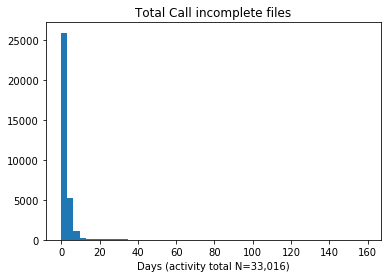

Days (activity wait=33,016 vs exec=3,025)


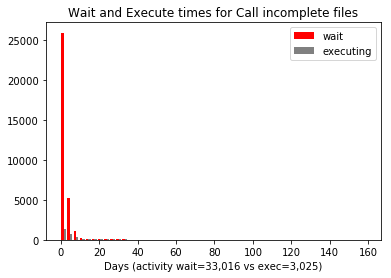

In [12]:
acty = 'Call incomplete files'
mask = deltadf['Activity'] == 'W_Call incomplete files'
actydf = deltadf.loc[mask]
# maskexec = pd.to_timedelta(actydf['Delta Exec'])   > pd.Timedelta('1 Second')
# maskwait = pd.to_timedelta(actydf['Delta Trans'])  > pd.Timedelta('1 Second')
maskexec = actydf['Delta Exec']  > pd.Timedelta('1 Second')
maskwait = actydf['Delta Trans'] > pd.Timedelta('1 Second')


x =  actydf['Delta']
# x =  pd.to_timedelta(actydf['Delta']) / np.timedelta64(1, 's')
# x =  util.seconds2hours(x)
# x =  x / 24
n = actydf.shape[0]
xlabel = "Days (activity total N=%s)" % ("{:,}".format(n))
print xlabel
title = "Total " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist(x, bins=50, color='#1f77b4')
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

w = x[maskwait]
y = x[maskexec]
n = len(y)
xlabel = "Days (activity wait=%s vs exec=%s)" % ("{:,}".format(len(w)),"{:,}".format(len(y)))
print xlabel
title = "Wait and Execute times for " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist((w,y), bins=50, color=('red','gray'))
plt.legend(('wait','executing'))
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

Days (activity total N=29,512)


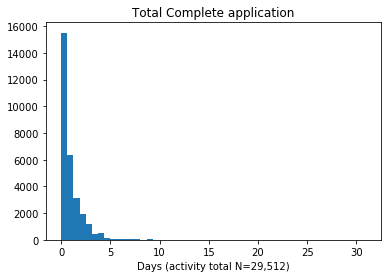

Days (activity wait=20,496 vs exec=19,059)


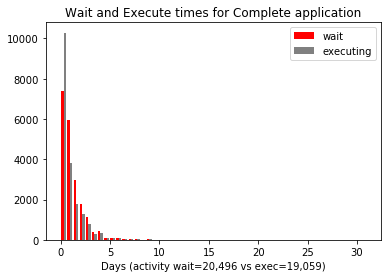

In [13]:
acty = 'Complete application'
mask = deltadf['Activity'] == 'W_Complete application'
actydf = deltadf.loc[mask]
# maskexec = pd.to_timedelta(actydf['Delta Exec'])   > pd.Timedelta('1 Second')
# maskwait = pd.to_timedelta(actydf['Delta Trans'])  > pd.Timedelta('1 Second')
maskexec = actydf['Delta Exec']  > pd.Timedelta('1 Second')
maskwait = actydf['Delta Trans'] > pd.Timedelta('1 Second')


x =  actydf['Delta']


# x =  pd.to_timedelta(actydf['Delta']) / np.timedelta64(1, 's')
# x =  util.seconds2hours(x)
# x =  x / 24
n = actydf.shape[0]
xlabel = "Days (activity total N=%s)" % ("{:,}".format(n))
print xlabel
title = "Total " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist(x, bins=50, color='#1f77b4')
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

w = x[maskwait]
y = x[maskexec]
n = len(y)
xlabel = "Days (activity wait=%s vs exec=%s)" % ("{:,}".format(len(w)),"{:,}".format(len(y)))
print xlabel
title = "Wait and Execute times for " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist((w,y), bins=50, color=('red','gray'))
plt.legend(('wait','executing'))
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

Days (activity total N=3,705)


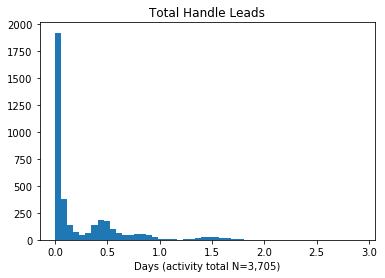

Days (activity wait=3,705 vs exec=3,470)


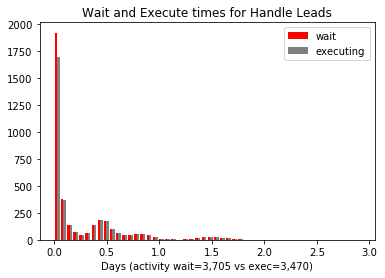

In [14]:
acty = 'Handle Leads'
mask = deltadf['Activity'] == 'W_Handle leads'
actydf = deltadf.loc[mask]
maskexec = actydf['Delta Exec']  > pd.Timedelta('1 Second')
maskwait = actydf['Delta Trans'] > pd.Timedelta('1 Second')


x =  actydf['Delta']



# x =  pd.to_timedelta(actydf['Delta']) / np.timedelta64(1, 's')
# x =  util.seconds2hours(x)
# x =  x / 24
n = actydf.shape[0]
xlabel = "Days (activity total N=%s)" % ("{:,}".format(n))
print xlabel
title = "Total " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist(x, bins=50, color='#1f77b4')
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

w = x[maskwait]
y = x[maskexec]
n = len(y)
xlabel = "Days (activity wait=%s vs exec=%s)" % ("{:,}".format(len(w)),"{:,}".format(len(y)))
print xlabel
title = "Wait and Execute times for " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist((w,y), bins=50, color=('red','gray'))
plt.legend(('wait','executing'))
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

Days (activity total N=2)


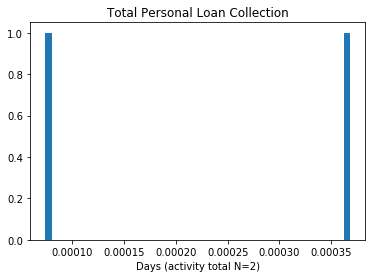

Days (activity wait=2 vs exec=0)


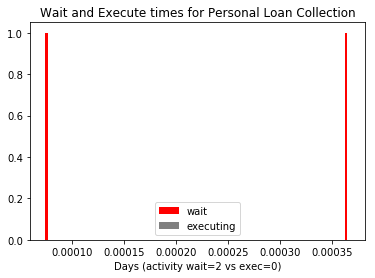

In [15]:
acty = 'Personal Loan Collection'
mask = deltadf['Activity'] == 'W_Personal Loan collection'
actydf = deltadf.loc[mask]
# maskexec = pd.to_timedelta(actydf['Delta Exec'])   > pd.Timedelta('1 Second')
# maskwait = pd.to_timedelta(actydf['Delta Trans'])  > pd.Timedelta('1 Second')

maskexec = actydf['Delta Exec']  > pd.Timedelta('1 Second')
maskwait = actydf['Delta Trans'] > pd.Timedelta('1 Second')


x =  actydf['Delta']

# x =  pd.to_timedelta(actydf['Delta']) / np.timedelta64(1, 's')
# x =  util.seconds2hours(x)
# x =  x / 24
n = actydf.shape[0]
xlabel = "Days (activity total N=%s)" % ("{:,}".format(n))
print xlabel
title = "Total " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist(x, bins=50, color='#1f77b4')
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

w = x[maskwait]
y = x[maskexec]
n = len(y)
xlabel = "Days (activity wait=%s vs exec=%s)" % ("{:,}".format(len(w)),"{:,}".format(len(y)))
print xlabel
title = "Wait and Execute times for " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist((w,y), bins=50, color=('red','gray'))
plt.legend(('wait','executing'))
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

Days (activity total N=87)


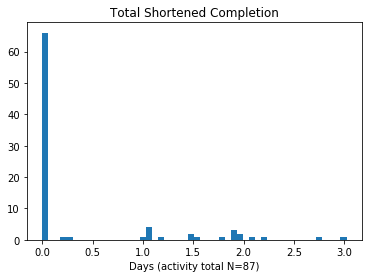

Days (activity wait=87 vs exec=0)


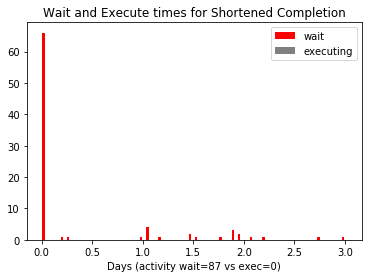

In [16]:
acty = 'Shortened Completion'
mask = deltadf['Activity'] == 'W_Shortened completion'
actydf = deltadf.loc[mask]
# maskexec = pd.to_timedelta(actydf['Delta Exec'])   > pd.Timedelta('1 Second')
# maskwait = pd.to_timedelta(actydf['Delta Trans'])  > pd.Timedelta('1 Second')

maskexec = actydf['Delta Exec']  > pd.Timedelta('1 Second')
maskwait = actydf['Delta Trans'] > pd.Timedelta('1 Second')


x =  actydf['Delta']

# x =  pd.to_timedelta(actydf['Delta']) / np.timedelta64(1, 's')
# x =  util.seconds2hours(x)
# x =  x / 24
n = actydf.shape[0]
xlabel = "Days (activity total N=%s)" % ("{:,}".format(n))
print xlabel
title = "Total " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist(x, bins=50, color='#1f77b4')
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()

w = x[maskwait]
y = x[maskexec]
n = len(y)
xlabel = "Days (activity wait=%s vs exec=%s)" % ("{:,}".format(len(w)),"{:,}".format(len(y)))
print xlabel
title = "Wait and Execute times for " + acty
plt.title(title)
plt.xlabel(xlabel)
plt.hist((w,y), bins=50, color=('red','gray'))
plt.legend(('wait','executing'))
plt.savefig("throughput_analysis_3_" + "_".join(title.split(' ')).lower() + ".eps", format='eps', dpi=1000)
plt.show()